In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Desk Files/IMDBMovie.csv')
df

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074,333.13
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820,126.46
2,3,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606,138.12
3,4,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545,270.32
4,5,Suicide Squad,Action,David Ayer,2016,123,6.2,393727,325.02
...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,2015,111,6.2,27585,NaN
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5.5,73152,17.54
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6.2,70699,58.01
998,999,Search Party,Adventure,Scot Armstrong,2014,93,5.6,4881,NaN


In [4]:
len(df)

1000

In [5]:
df.shape

(1000, 9)

In [6]:
df.dtypes

ID                    int64
Title                object
Genre                object
Director             object
Year                  int64
Runtime_minutes       int64
Rating              float64
Votes                 int64
Revenue_millions    float64
dtype: object

What is the 75th percentile of rating in the IMDB dataset?

In [7]:
rating_75th = df['Rating'].quantile(0.75)
rating_75th

7.4

How many NA values are there in the field ‘Revenue’?

In [8]:
df['Revenue_millions'].isnull().sum()

128

Data slicing:

We need to slice and dice the data to get a fair understanding of top earning movies, underrated movies and some additional statistics such as yearly revenue and average ratings

How many movies have revenue higher than 75 million?

In [9]:
movies_with_higher_revenue_75 = len(df[df['Revenue_millions']>75])
movies_with_higher_revenue_75

318

How many movies have revenue greater than 50 million but rating less than 7?

In [10]:
count_movies = len(df[(df['Revenue_millions']>50) & (df['Rating']<7)])
count_movies

211

What is the total revenue generated by movies in the year 2015?

In [11]:
revenue_generated_2015 = df[df['Year']==2015]['Revenue_millions'].sum()
round(revenue_generated_2015, 2)

8854.12

What is the average rating for the genre adventure in the year 2015?

In [12]:
average_rtg_adventure = df[(df['Year']==2015) & (df['Genre']=='Adventure')]['Rating'].mean()
average_rtg_adventure

6.8

What is the average duration of movies in rows 75 to 150? Please note that the rows in python start from 0.

In [13]:
average_duration_movies = df.iloc[75:150]['Runtime_minutes'].mean()
round(average_duration_movies, 2)

127.61

Which year generated the highest revenue?

In [14]:
Highest_revenue_year =  df.groupby('Year')['Revenue_millions'].sum()
Highest_revenue_year.idxmax()

2016

What is the maximum revenue out of (10,20,30,40,50) rows?

In [15]:
max_revenue = df.iloc[10:51]['Revenue_millions'].max()
max_revenue

936.63

How many movies with the genres ‘Adventure’, ‘Action’, ‘Horror’, and ‘Crime’ exist in the IMDB dataset?

In [17]:
target_genres = ['Adventure', 'Action', 'Horror', 'Crime']

is_target_genre = df['Genre'].apply(lambda x: any(genre in x for genre in target_genres))

num_movies_with_target_genres = is_target_genre.sum()

num_movies_with_target_genres

485

Create a genre-level report with metrics average rating, the average number of votes, and average revenue. What is the average rating of the ‘Horror’ genre? (Round to 2 decimal places)

In [18]:
genre_report = df.groupby('Genre').agg({
    'Rating': 'mean',
    'Votes' : 'mean',
    'Revenue_millions' : 'mean'}).reset_index()

genre_report.columns = ['Genre', 'Average Rating', 'Average votes', 'Average Revenue']

round(genre_report, 2)

,Genre,Average Rating,Average votes,Average Revenue
0,Action,6.59,235948.58,122.09
1,Adventure,6.91,225669.32,113.45
2,Animation,7.32,208159.43,191.22
3,Biography,7.32,153060.72,55.95
4,Comedy,6.49,115640.19,51.58
5,Crime,6.81,150124.96,41.04
6,Drama,6.95,129445.13,35.87
7,Fantasy,5.85,106723.00,63.11
8,Horror,5.87,79435.41,39.95
9,Mystery,6.88,218672.00,64.38


Create a report to showcase the revenue of each movie, as % revenue concerning the total revenue of the respective genre and year of the movie.
What is the  % revenue of the movie ‘Split’ in its respective genre and year?


In [19]:
genre_year_total_revenue = df.groupby(['Genre','Year'])['Revenue_millions'].transform('sum')

split_revenue = df[(df['Title']=='Split')]['Revenue_millions'].values[0]

percentage_revenue_split = (split_revenue * 100)/genre_year_total_revenue[df['Title']=='Split'].values[0]

round(percentage_revenue_split, 2)

29.42

What is the average ‘Votes_norm’ ?

In [20]:
max_votes = df['Votes'].max()
min_votes = df['Votes'].min()

def normalize_votes(votes):
    return ((votes - min_votes) * 10)/(max_votes - min_votes)

df['votes_norm'] = df['Votes'].apply(normalize_votes)

average_votes_norm = df['votes_norm'].mean().round(2)

average_votes_norm

0.95

What is the highest ‘Total_rating’ ?

In [21]:
def Cal_total_rtg(row):
    return row['Rating'] + row['votes_norm']

df['Total_rating'] = df.apply(Cal_total_rtg, axis=1)

highest_total_rating = df['Total_rating'].max()
highest_total_rating

19.0

Create a new column ‘Revenue_bins’ so that ‘Revenue_millions’ are categorized in buckets 0-50, 51-100, 101-150, and 150+. Which bucket has the highest number of movies?

In [22]:
bins = [0, 50, 100, 150, float('inf')]
labels = ['0-50', '51-100', '101-150', '150+']

df['Revenue_bins'] = pd.cut(df['Revenue_millions'], bins=bins, labels=labels)

highest_bucket = df['Revenue_bins'].value_counts().idxmax()

highest_bucket

'0-50'

Finding the Top Grossing Movies within the Dataset

In [23]:
df[['Title', 'Revenue_millions']].sort_values(by= 'Revenue_millions', ascending = False).head(10)

,Title,Revenue_millions
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


Top 10 movie titles with average votes

In [24]:
average_votes = df.groupby('Title')['Votes'].mean()

sort_movies = average_votes.sort_values(ascending = False)

top_movies = sort_movies.head(10)

top_movies

Title
The Dark Knight          1791916.0
Inception                1583625.0
The Dark Knight Rises    1222645.0
Interstellar             1047747.0
The Avengers             1045588.0
Django Unchained         1039115.0
Inglourious Basterds      959065.0
The Departed              937414.0
Avatar                    935408.0
The Prestige              913152.0
Name: Votes, dtype: float64

Revenue according to Directors

In [38]:
sum_of_revenue = df.groupby('Director')['Revenue_millions'].sum()

sort_director = sum_of_revenue.sort_values(ascending=False)

Top_directors = sort_director.head(10)

Top_directors

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder           975.74
Peter Jackson         860.45
Gore Verbinski        829.82
Name: Revenue_millions, dtype: float64

*Count of unique directors*

In [44]:
director_count = df['Director'].str.split(',').explode()

director_count.nunique()

644

**Creating a histogram**

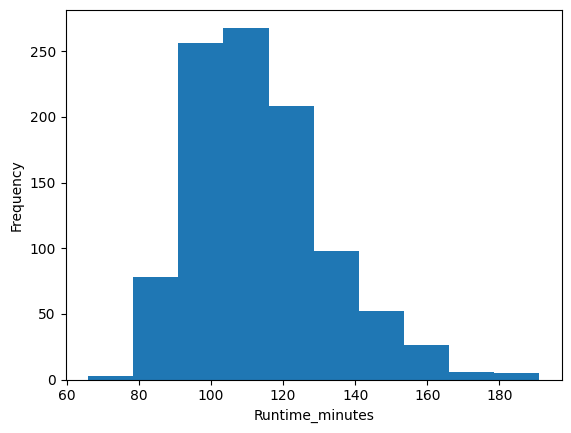

In [35]:
df['Runtime_minutes'].plot(kind='hist', bins=10)

plt.xlabel('Runtime_minutes')
plt.ylabel('Frequency')

plt.show()

The Above histogram shows that most of the movies has a run time of 100 to 120 minutes.

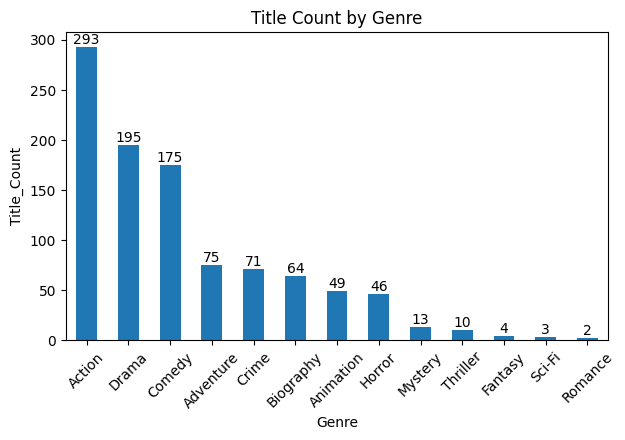

In [51]:
genre_counts = df['Genre'].value_counts()

genre_counts = genre_counts.sort_values(ascending=False)

plt.figure(figsize=(7, 4))
bars = genre_counts.plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Title_Count')
plt.title('Title Count by Genre')

plt.xticks(rotation=45)

for i, v in enumerate(genre_counts):
    bars.text(i, v, str(v), ha='center', va='bottom')

The above bar chart shows the number of movie count according to genre 

In [37]:
df

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions,votes_norm,Total_rating,Revenue_bins
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074,333.13,4.224745,12.324745,150+
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820,126.46,2.710928,9.710928,101-150
2,3,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606,138.12,0.879229,8.179229,101-150
3,4,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545,270.32,0.337550,7.537550,150+
4,5,Suicide Squad,Action,David Ayer,2016,123,6.2,393727,325.02,2.196975,8.396975,150+
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,2015,111,6.2,27585,NaN,0.153606,6.353606,NaN
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5.5,73152,17.54,0.407907,5.907907,0-50
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6.2,70699,58.01,0.394217,6.594217,51-100
998,999,Search Party,Adventure,Scot Armstrong,2014,93,5.6,4881,NaN,0.026899,5.626899,NaN


Text(0, 0.5, 'Runtime_minutes')

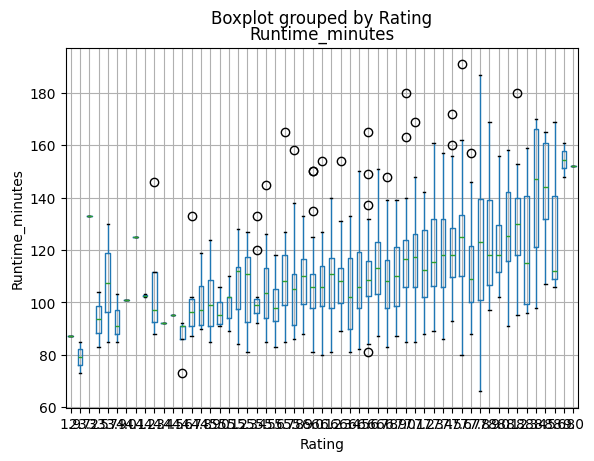

In [50]:
df.boxplot(column = 'Runtime_minutes', by='Rating')

plt.xlabel('Rating')
plt.ylabel('Runtime_minutes')

The above boxplot tells us that if the movie duration is below 140 mins it’s more likely to receive a rating.